# Binary Search Tree

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
from graphviz import Graph, Digraph

In [3]:
L = ["A", "B", "C", "D", "E", "F", "G"]
"E" in L # O(N) -- can we be faster?

True

CHECK D
CHECK F
CHECK G
True


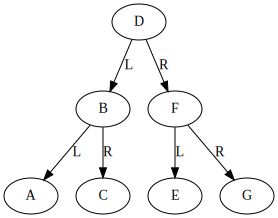

In [4]:
from IPython.core.display import display

# binary search tree (each node has at most 2 children)
# every value in the left subtree of a node must be less than that node's value
# every value in the right subtree of a node must be greater than that node's value
# is a particular BST a good one?  (balanced)
class Node:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None

    def draw_edges(self, g):
        g.node(str(self.val))

        if self.left != None:
            g.edge(str(self.val), str(self.left.val), label="L")
            self.left.draw_edges(g)
            
        if self.right != None:
            g.edge(str(self.val), str(self.right.val), label="R")
            self.right.draw_edges(g)

    def _repr_svg_(self):
        g = Digraph()
        self.draw_edges(g)
        return g._repr_svg_()
    
    def __contains__(self, x):
        print("CHECK", self.val)
        if self.val == x:
            return True
        elif x < self.val:
            if self.left != None:
                return self.left.__contains__(x)
        else:
            # self.val > x must be true
            if self.right != None:
                return self.right.__contains__(x)
            
        return False
    
    def add(self, x):
        if x < self.val:
            # add it to left subtree
            if self.left == None:
                self.left = Node(x)
            else:
                self.left.add(x)
        elif x > self.val:
            # add it to right subtree
            if self.right == None:
                self.right = Node(x)
            else:
                self.right.add(x)
    
tree = Node("D")
tree.add("B")
tree.add("A")
tree.add("C")
tree.add("F")
tree.add("E")
tree.add("G")
# letter order: A,B,C,D,E,F,G
print("G" in tree)
tree

# BST-based Dictionary

In [5]:
from IPython.core.display import display

# binary search tree (each node has at most 2 children)
# every key in the left subtree of a node must be less than that node's keyue
# every key in the right subtree of a node must be greater than that node's keyue
# is a particular BST a good one?  (balanced)
# GOAL: want to make a new kind of dict
class Node:
    def __init__(self, key, val):
        self.key = key
        self.val = val
        self.left = None
        self.right = None

    def draw_edges(self, g):
        g.node(self.key, f"{self.key}: {self.val}")

        if self.left != None:
            g.edge(self.key, self.left.key, label="L")
            self.left.draw_edges(g)
            
        if self.right != None:
            g.edge(self.key, self.right.key, label="R")
            self.right.draw_edges(g)

    def _repr_svg_(self):
        g = Digraph()
        self.draw_edges(g)
        return g._repr_svg_()
    
    def __getitem__(self, key):
        if self.key == key:
            return self.val
        elif key < self.key:
            if self.left != None:
                return self.left.__getitem__(key)
        else:
            # self.key > key must be true
            if self.right != None:
                return self.right.__getitem__(key)
            
        return None

    def __setitem__(self, key, val):
        if key < self.key:
            # add it to left subtree
            if self.left == None:
                self.left = Node(key, val)
            else:
                self.left.__setitem__(key, val)
        elif key > self.key:
            # add it to right subtree
            if self.right == None:
                self.right = Node(key, val)
            else:
                self.right.__setitem__(key, val)
    
tree = Node("D", 1)
tree["B"] = 2
tree["A"] = 4
tree["C"] = 3
print(tree["C"])
print(tree["A"])

3
4
